In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

In [9]:
pd.set_option("display.max_columns", None)

df = pd.read_csv("/content/sample_data/DataSet4.csv")
df.head(10)

,Brand,Body_Type,Fuel_Type,Transmission,Engine_CC,Mileage_km_per_l,Price_USD,Manufacturing_Country,Car_Age
0,Mercedes,SUV,Petrol,Manual,4089,17,73407,USA,20
1,Nissan,Coupe,Petrol,Automatic,4618,25,79370,USA,3
2,Nissan,Hatchback,Diesel,Manual,1802,16,76549,China,19
3,Nissan,Coupe,Petrol,Manual,1835,16,48722,USA,13
4,Hyundai,Hatchback,Hybrid,Automatic,2332,28,83265,UK,17
5,Tesla,Coupe,Diesel,Automatic,2124,19,63134,UK,14
6,Audi,Hatchback,Petrol,Automatic,4527,29,74241,Japan,15
7,Tesla,SUV,Diesel,Automatic,1729,20,54364,China,10
8,Audi,Hatchback,Hybrid,Manual,1561,12,65750,Germany,9
9,Honda,Sedan,Electric,Manual,4254,17,8511,South Korea,6


In [12]:
df.dtypes

,0
Brand,object
Body_Type,object
Fuel_Type,object
Transmission,object
Engine_CC,int64
Mileage_km_per_l,int64
Price_USD,int64
Manufacturing_Country,object
Car_Age,int64


In [23]:
df.isna().sum()

,0
Brand,0
Body_Type,0
Fuel_Type,0
Transmission,0
Engine_CC,0
Mileage_km_per_l,0
Price_USD,6
Manufacturing_Country,0
Car_Age,0


In [26]:
# Copy the dataset and adding missing values to a numeric column (Price_USD)
df_missing = df.copy()
df_missing.loc[0:5, 'Price_USD'] = np.nan

In [27]:
df_missing.isna().sum()

,0
Brand,0
Body_Type,0
Fuel_Type,0
Transmission,0
Engine_CC,0
Mileage_km_per_l,0
Price_USD,6
Manufacturing_Country,0
Car_Age,0


In [28]:
print("Original shape: ",df.shape)
print("After removing some values: ",df_missing.shape)

Original shape:  (300, 9)
After removing some values:  (300, 9)


In [29]:
df_missing.head(10)

,Brand,Body_Type,Fuel_Type,Transmission,Engine_CC,Mileage_km_per_l,Price_USD,Manufacturing_Country,Car_Age
0,Mercedes,SUV,Petrol,Manual,4089,17,NaN,USA,20
1,Nissan,Coupe,Petrol,Automatic,4618,25,NaN,USA,3
2,Nissan,Hatchback,Diesel,Manual,1802,16,NaN,China,19
3,Nissan,Coupe,Petrol,Manual,1835,16,NaN,USA,13
4,Hyundai,Hatchback,Hybrid,Automatic,2332,28,NaN,UK,17
5,Tesla,Coupe,Diesel,Automatic,2124,19,NaN,UK,14
6,Audi,Hatchback,Petrol,Automatic,4527,29,74241.0,Japan,15
7,Tesla,SUV,Diesel,Automatic,1729,20,54364.0,China,10
8,Audi,Hatchback,Hybrid,Manual,1561,12,65750.0,Germany,9
9,Honda,Sedan,Electric,Manual,4254,17,8511.0,South Korea,6


In [30]:
df_removed = df_missing.dropna()
df_removed.shape

(294, 9)

In [31]:
df_removed.isna().sum()

,0
Brand,0
Body_Type,0
Fuel_Type,0
Transmission,0
Engine_CC,0
Mileage_km_per_l,0
Price_USD,0
Manufacturing_Country,0
Car_Age,0


In [32]:
df_imputed_mean = df_missing.copy()

# Fill missing values in Price_USD with the column mean
df_imputed_mean['Price_USD'].fillna(df_imputed_mean['Price_USD'].mean(), inplace=True)

df_imputed_mean.isna().sum()

/tmp/ipython-input-186/815546571.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_imputed_mean['Price_USD'].fillna(df_imputed_mean['Price_USD'].mean(), inplace=True)


,0
Brand,0
Body_Type,0
Fuel_Type,0
Transmission,0
Engine_CC,0
Mileage_km_per_l,0
Price_USD,0
Manufacturing_Country,0
Car_Age,0


In [33]:
df_imputed_mean.head(10)

,Brand,Body_Type,Fuel_Type,Transmission,Engine_CC,Mileage_km_per_l,Price_USD,Manufacturing_Country,Car_Age
0,Mercedes,SUV,Petrol,Manual,4089,17,60646.938776,USA,20
1,Nissan,Coupe,Petrol,Automatic,4618,25,60646.938776,USA,3
2,Nissan,Hatchback,Diesel,Manual,1802,16,60646.938776,China,19
3,Nissan,Coupe,Petrol,Manual,1835,16,60646.938776,USA,13
4,Hyundai,Hatchback,Hybrid,Automatic,2332,28,60646.938776,UK,17
5,Tesla,Coupe,Diesel,Automatic,2124,19,60646.938776,UK,14
6,Audi,Hatchback,Petrol,Automatic,4527,29,74241.000000,Japan,15
7,Tesla,SUV,Diesel,Automatic,1729,20,54364.000000,China,10
8,Audi,Hatchback,Hybrid,Manual,1561,12,65750.000000,Germany,9
9,Honda,Sedan,Electric,Manual,4254,17,8511.000000,South Korea,6


In [34]:
df_imputed_median = df_missing.copy()

# Fill missing values in Price_USD with the column median
df_imputed_median['Price_USD'].fillna(df_imputed_median['Price_USD'].median(), inplace=True)


df_imputed_median.isna().sum()

/tmp/ipython-input-186/1580059703.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_imputed_median['Price_USD'].fillna(df_imputed_median['Price_USD'].median(), inplace=True)


,0
Brand,0
Body_Type,0
Fuel_Type,0
Transmission,0
Engine_CC,0
Mileage_km_per_l,0
Price_USD,0
Manufacturing_Country,0
Car_Age,0


In [35]:
df_imputed_median.head(10)

,Brand,Body_Type,Fuel_Type,Transmission,Engine_CC,Mileage_km_per_l,Price_USD,Manufacturing_Country,Car_Age
0,Mercedes,SUV,Petrol,Manual,4089,17,58152.0,USA,20
1,Nissan,Coupe,Petrol,Automatic,4618,25,58152.0,USA,3
2,Nissan,Hatchback,Diesel,Manual,1802,16,58152.0,China,19
3,Nissan,Coupe,Petrol,Manual,1835,16,58152.0,USA,13
4,Hyundai,Hatchback,Hybrid,Automatic,2332,28,58152.0,UK,17
5,Tesla,Coupe,Diesel,Automatic,2124,19,58152.0,UK,14
6,Audi,Hatchback,Petrol,Automatic,4527,29,74241.0,Japan,15
7,Tesla,SUV,Diesel,Automatic,1729,20,54364.0,China,10
8,Audi,Hatchback,Hybrid,Manual,1561,12,65750.0,Germany,9
9,Honda,Sedan,Electric,Manual,4254,17,8511.0,South Korea,6


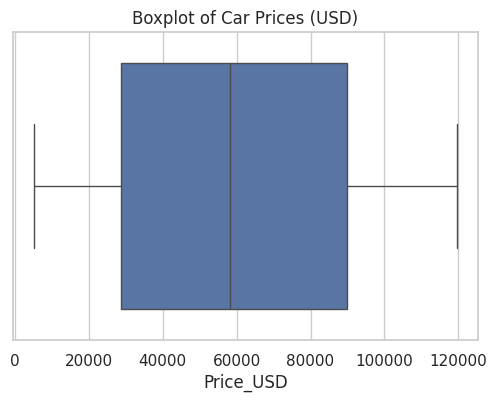

In [36]:
# Create boxplot for car prices
plt.figure(figsize=(6,4))
sns.boxplot(x=df['Price_USD'])

plt.title("Boxplot of Car Prices (USD)")
plt.show()

In [37]:
# Add an extreme outlier in Price_USD
df.loc[0, 'Price_USD'] = 1000000
df.head()

,Brand,Body_Type,Fuel_Type,Transmission,Engine_CC,Mileage_km_per_l,Price_USD,Manufacturing_Country,Car_Age
0,Mercedes,SUV,Petrol,Manual,4089,17,1000000.0,USA,20
1,Nissan,Coupe,Petrol,Automatic,4618,25,NaN,USA,3
2,Nissan,Hatchback,Diesel,Manual,1802,16,NaN,China,19
3,Nissan,Coupe,Petrol,Manual,1835,16,NaN,USA,13
4,Hyundai,Hatchback,Hybrid,Automatic,2332,28,NaN,UK,17


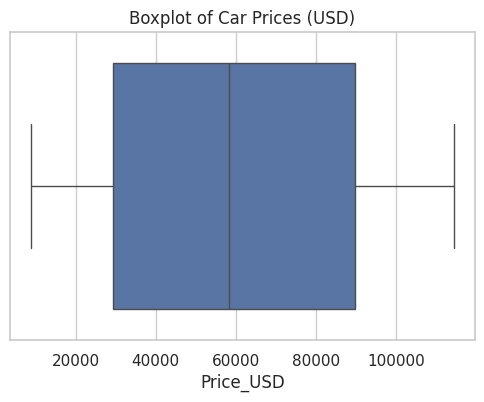

In [57]:
# Create boxplot for car prices
plt.figure(figsize=(6,4))
sns.boxplot(x=df['Price_USD'])

plt.title("Boxplot of Car Prices (USD)")
plt.show()

In [55]:
Q1 = df['Price_USD'].quantile(0.25)
Q3 = df['Price_USD'].quantile(0.75)

IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

outliers = df[(df['Price_USD'] < lower) | (df['Price_USD'] > upper)]

outliers.head(1)

,Brand,Body_Type,Fuel_Type,Transmission,Engine_CC,Mileage_km_per_l,Price_USD,Manufacturing_Country,Car_Age


In [53]:
#dataset size is slightly reduced. Removing outliers reduces distortion.

df_no_outliers = df[(df['Price_USD'] >= lower) & (df['Price_USD'] <= upper)]
print("Original shape: ",df.shape)
print("After removing outliers: ",df_no_outliers.shape)

Original shape:  (300, 9)
After removing outliers:  (300, 9)


In [61]:
df[['Price_USD', 'Engine_CC']].head()

,Price_USD,Engine_CC
0,114377.7,4089
1,58231.0,4618
2,58231.0,1802
3,58231.0,1835
4,58231.0,2332


In [59]:
df['Price_USD'] = df['Price_USD'].fillna(df['Price_USD'].median())

In [60]:
from sklearn.preprocessing import MinMaxScaler

# Create scaler
scaler = MinMaxScaler()

# Select your columns
df_scaled = df[['Price_USD', 'Engine_CC']].copy()

# Apply scaling
df_scaled[['Price_USD', 'Engine_CC']] = scaler.fit_transform(df_scaled)

# Show result
df_scaled.head()

,Price_USD,Engine_CC
0,1.000000,0.773353
1,0.467572,0.905835
2,0.467572,0.200601
3,0.467572,0.208866
4,0.467572,0.333333


In [62]:
from sklearn.preprocessing import StandardScaler

# Create scaler
scaler = StandardScaler()

# Select columns to standardize
df_standardized = df[['Price_USD', 'Engine_CC']].copy()

# Apply standardization
df_standardized[['Price_USD', 'Engine_CC']] = scaler.fit_transform(df_standardized)
df_standardized.head()

,Price_USD,Engine_CC
0,1.574778,0.928362
1,-0.073479,1.402346
2,-0.073479,-1.120787
3,-0.073479,-1.091219
4,-0.073479,-0.645908


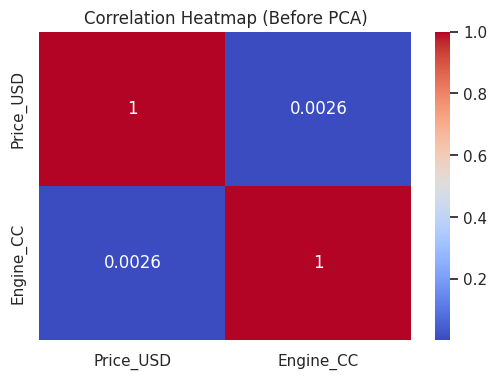

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.heatmap(
    df_standardized[['Price_USD','Engine_CC']].corr(),
    annot=True,
    cmap="coolwarm"
)

plt.title("Correlation Heatmap (Before PCA)")
plt.show()

In [64]:
from sklearn.decomposition import PCA

# Select standardized features
X = df_standardized[['Price_USD', 'Engine_CC']]

# Apply PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X)

# Show explained variance
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

Explained Variance Ratio: [0.50132437 0.49867563]


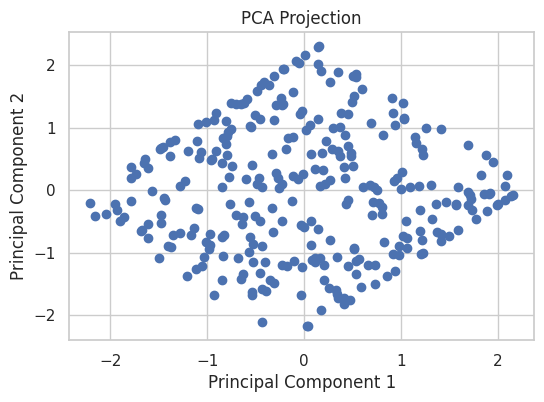

In [65]:
plt.figure(figsize=(6,4))

plt.scatter(principal_components[:,0], principal_components[:,1])

plt.title("PCA Projection")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

plt.show()